<a href="https://colab.research.google.com/github/mertgokcer/GoruntuIsleme/blob/main/244329022_Mert_Gokcer_Yapay_Sinir_Aglari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Veriyi ve Görselleri Yükleme ---

# Etiket dosyasını yükleme
labels_file = "/content/drive/MyDrive/TrainIJCNN2013/ex.txt"  # Etiket dosyası yolu
images_dir = "/content/drive/MyDrive/TrainIJCNN2013"  # Görsellerin bulunduğu klasör (lütfen değiştirin)

# Etiket dosyasını yükle
data = pd.read_csv(labels_file, delimiter=';', header=None, names=['Filename', 'X1', 'Y1', 'X2', 'Y2'])

# Görselleri ve etiketleri hazırlama
X = []
y = []

for index, row in data.iterrows():
    img_path = os.path.join(images_dir, row['Filename'])
    if os.path.exists(img_path):  # Görsel mevcutsa işle
        img = Image.open(img_path)
        cropped_img = img.crop((row['X1'], row['Y1'], row['X2'], row['Y2'])).resize((32, 32))
        X.append(np.array(cropped_img).flatten())  # Görselleri düz bir diziye çevir
        y.append(index % 10)  # Test amaçlı sınıf bilgisi (örnek)

X = np.array(X)
y = np.array(y)

print(f"Veri boyutu: {X.shape}, Etiket boyutu: {y.shape}")

# --- 2. Eğitim ve Test Verisi Ayırma ---

# %80 eğitim, %20 test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Eğitim veri boyutu: {X_train.shape}, Test veri boyutu: {X_test.shape}")

Veri boyutu: (954, 3072), Etiket boyutu: (954,)
Eğitim veri boyutu: (763, 3072), Test veri boyutu: (191, 3072)


Model eğitiliyor...
Model eğitimi tamamlandı.

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.07      0.04      0.05        27
           1       0.20      0.20      0.20        20
           2       0.00      0.00      0.00        19
           3       0.14      0.11      0.12        19
           4       0.15      0.18      0.16        17
           5       0.06      0.07      0.06        14
           6       0.00      0.00      0.00        17
           7       0.04      0.07      0.05        14
           8       0.20      0.12      0.15        26
           9       0.03      0.06      0.04        18

    accuracy                           0.08       191
   macro avg       0.09      0.08      0.08       191
weighted avg       0.10      0.08      0.09       191



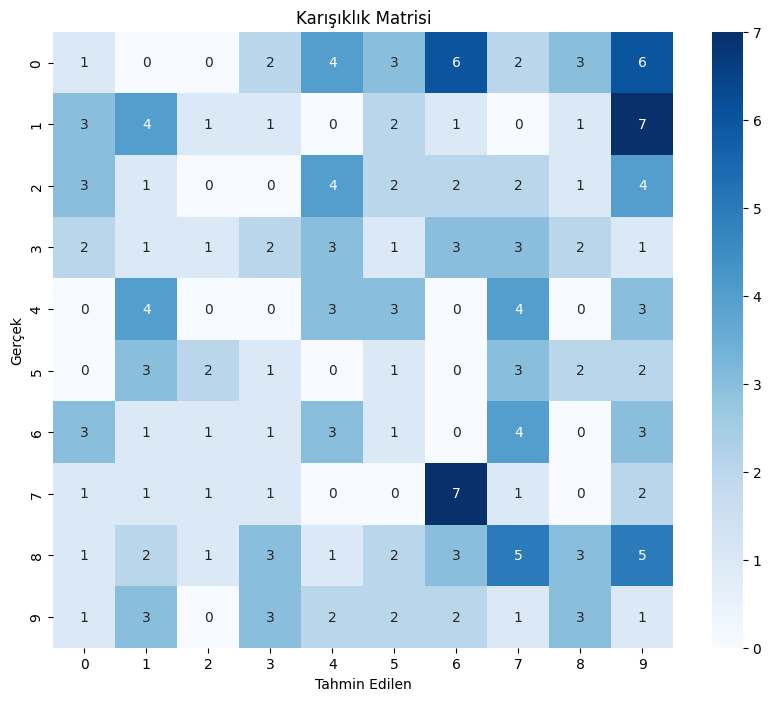

Eğitim Doğruluğu: 86.89%
Test Doğruluğu: 8.38%


In [2]:
# --- 3. MLP Modeli Eğitimi ---

# MLPClassifier modeli
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # 2 katman: 100 ve 50 nöron
    activation='relu',  # Aktivasyon fonksiyonu
    solver='adam',  # Optimizasyon algoritması
    learning_rate_init=0.001,  # Öğrenme hızı
    max_iter=300,  # Maksimum iterasyon
    random_state=42
)

# Modeli eğit
print("Model eğitiliyor...")
mlp.fit(X_train, y_train)
print("Model eğitimi tamamlandı.")

# --- 4. Model Değerlendirmesi ---

# Test verisinde tahmin yapma
y_pred = mlp.predict(X_test)

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# --- 5. Model Performansını Görselleştirme ---

# Eğitim ve test doğruluklarını al
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print(f"Eğitim Doğruluğu: {train_score * 100:.2f}%")
print(f"Test Doğruluğu: {test_score * 100:.2f}%")

RBF Modeli eğitiliyor...
Epoch 1/20
24/24 - 2s - 92ms/step - accuracy: 0.1035 - loss: 3.0169 - val_accuracy: 0.0681 - val_loss: 3.5073
Epoch 2/20
24/24 - 0s - 14ms/step - accuracy: 0.1573 - loss: 2.7606 - val_accuracy: 0.1099 - val_loss: 2.6706
Epoch 3/20
24/24 - 0s - 14ms/step - accuracy: 0.2136 - loss: 2.4060 - val_accuracy: 0.1047 - val_loss: 2.5364
Epoch 4/20
24/24 - 0s - 14ms/step - accuracy: 0.2412 - loss: 2.2874 - val_accuracy: 0.0471 - val_loss: 2.9087
Epoch 5/20
24/24 - 0s - 14ms/step - accuracy: 0.2923 - loss: 2.1076 - val_accuracy: 0.0681 - val_loss: 2.7123
Epoch 6/20
24/24 - 1s - 21ms/step - accuracy: 0.3290 - loss: 1.9665 - val_accuracy: 0.0995 - val_loss: 2.6078
Epoch 7/20
24/24 - 0s - 8ms/step - accuracy: 0.3670 - loss: 1.9401 - val_accuracy: 0.0681 - val_loss: 2.8916
Epoch 8/20
24/24 - 0s - 12ms/step - accuracy: 0.3748 - loss: 1.8903 - val_accuracy: 0.0890 - val_loss: 2.7602
Epoch 9/20
24/24 - 0s - 12ms/step - accuracy: 0.4286 - loss: 1.7436 - val_accuracy: 0.1047 - val

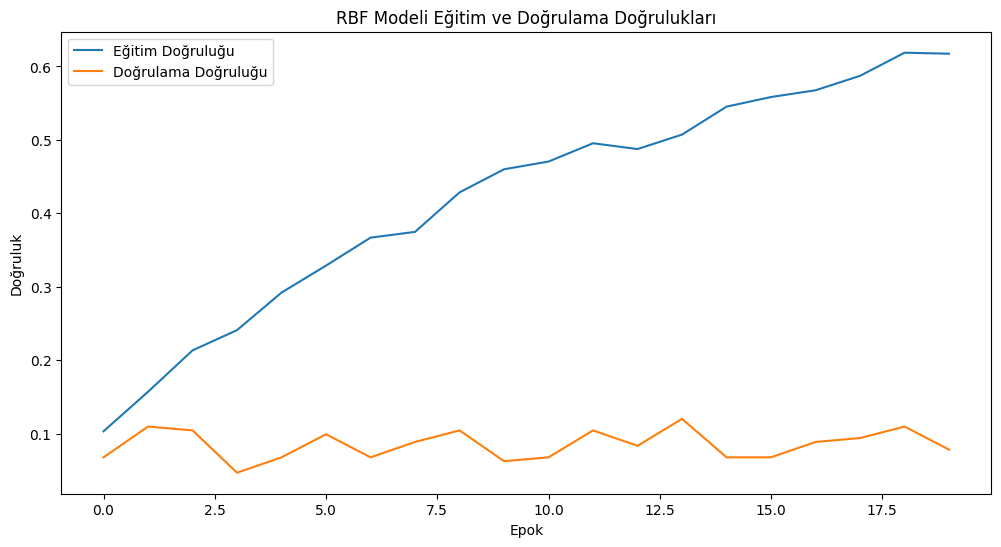

In [3]:
# RBF Modeli
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

rbf_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Giriş boyutu
    Dense(100, activation='relu'),    # İlk gizli katman
    Dense(50, activation='relu'),     # İkinci gizli katman
    Dense(10, activation='softmax')   # Çıkış katmanı (10 sınıf için)
])

# Modeli derleme
rbf_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
print("RBF Modeli eğitiliyor...")
history = rbf_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, verbose=2)
print("RBF Modeli eğitimi tamamlandı.")

# Performans değerlendirmesi
rbf_test_loss, rbf_test_accuracy = rbf_model.evaluate(X_test, y_test, verbose=0)
print(f"RBF Modeli Test Doğruluğu: {rbf_test_accuracy * 100:.2f}%")

# Eğitim ve doğrulama doğruluklarını görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title("RBF Modeli Eğitim ve Doğrulama Doğrulukları")
plt.xlabel("Epok")
plt.ylabel("Doğruluk")
plt.legend()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

RBF Modeli Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.25      0.07      0.11        27
           1       0.22      0.10      0.14        20
           2       0.00      0.00      0.00        19
           3       0.13      0.16      0.14        19
           4       0.08      0.06      0.07        17
           5       0.07      0.07      0.07        14
           6       0.05      0.18      0.07        17
           7       0.07      0.07      0.07        14
           8       0.15      0.08      0.10        26
           9       0.00      0.00      0.00        18

    accuracy                           0.08       191
   macro avg       0.10      0.08      0.08       191
weighted avg       0.11      0.08      0.08       191



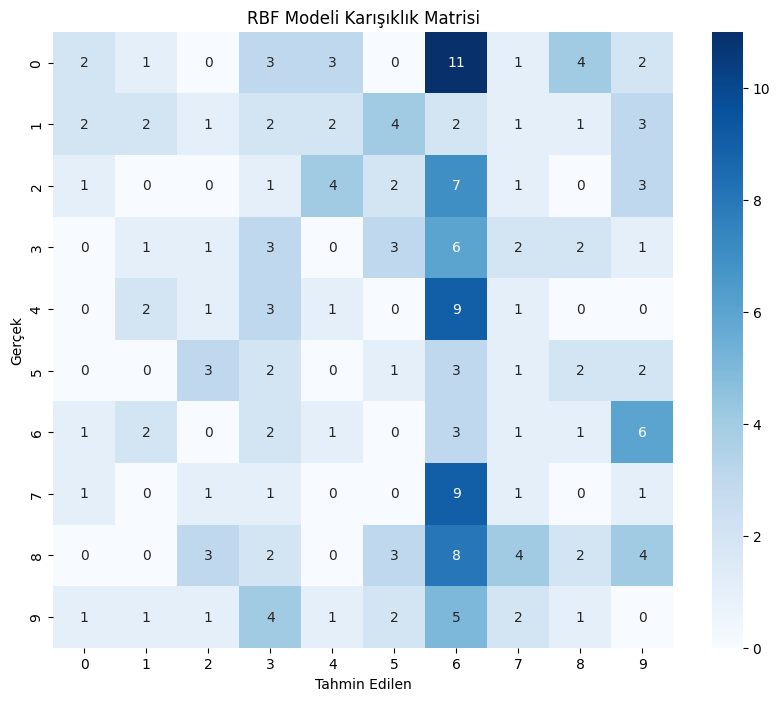

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Tahminleri sınıflandırma
y_pred_rbf = np.argmax(rbf_model.predict(X_test), axis=-1)

# Sınıflandırma raporu
print("\nRBF Modeli Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_rbf))

# Karışıklık Matrisi
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Karışıklık Matrisini Görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("RBF Modeli Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()


In [5]:
# Performans Metrikleri

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision (macro average tüm sınıflar için ortalama alır)
precision = precision_score(y_test, y_pred, average='macro')
# Recall
recall = recall_score(y_test, y_pred, average='macro')
# F1 Score
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1 Score (macro): {f1:.2f}")


Accuracy: 0.08
Precision (macro): 0.09
Recall (macro): 0.08
F1 Score (macro): 0.08


In [4]:
# Hiperparametre Denemeleri

from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01]
}

grid_search = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Eğitim Doğruluğu:", grid_search.best_score_)

# En iyi modelle yeniden tahmin yapma
best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test)
print("\nSınıflandırma Raporu (En iyi model):")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   7.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   5.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=  15.6s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=adam; total time=   6.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=adam; total time=   9.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=adam; total time=  10.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=sgd; total time=   6.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=sgd; total time=   4.8s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=sgd; total time=   9.8s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam; total time=   6.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam; total time=   9.6s
[CV] END activatio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=  20.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=  19.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=  19.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=   3.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=   2.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=   5.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=   5.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=   8.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=   8.7s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=adam; total time=   8.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=adam; total time=  14.9s
[CV] 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=sgd; total time=  18.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=sgd; total time=  18.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=sgd; total time=  20.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=adam; total time=   6.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=adam; total time=   5.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=adam; total time=   7.8s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=sgd; total time=   8.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=sgd; total time=  11.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=sgd; total time=  13.7s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=  16.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=adam; total time=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=  12.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=  12.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, solver=sgd; total time=  10.5s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=adam; total time=   6.9s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=adam; total time=   4.1s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=adam; total time=   2.2s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=sgd; total time=   5.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=sgd; total time=   5.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, solver=sgd; total time=   5.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam; total time=  13.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=adam; total time=  13.1s
[CV] END activatio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=  20.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=  18.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, solver=sgd; total time=  18.8s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=   9.1s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=   8.7s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  13.6s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=   5.8s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=adam; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=adam; total time=   5.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=adam; total time=  12.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=sgd; total time=  21.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=sgd; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, solver=sgd; total time=  19.8s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=adam; total time=   3.5s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=adam; total time=   5.9s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=adam; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=sgd; total time=   4.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=sgd; total time=   8.8s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, solver=sgd; total time=  15.1s
En İyi Parametreler: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01, 'solver': 'adam'}
En İyi Eğitim Doğruluğu: 0.11141989604240647

Sınıflandırma Raporu (En iyi model):
          